In [2]:
 # Use the Real Estate Valuation database:
 # • Apply linear regression and logistic regression to justify the outcomes.

#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Importing the dataset

df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/ml 7th sem codes/datasets/realestate.csv', index_col=0)
df


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  

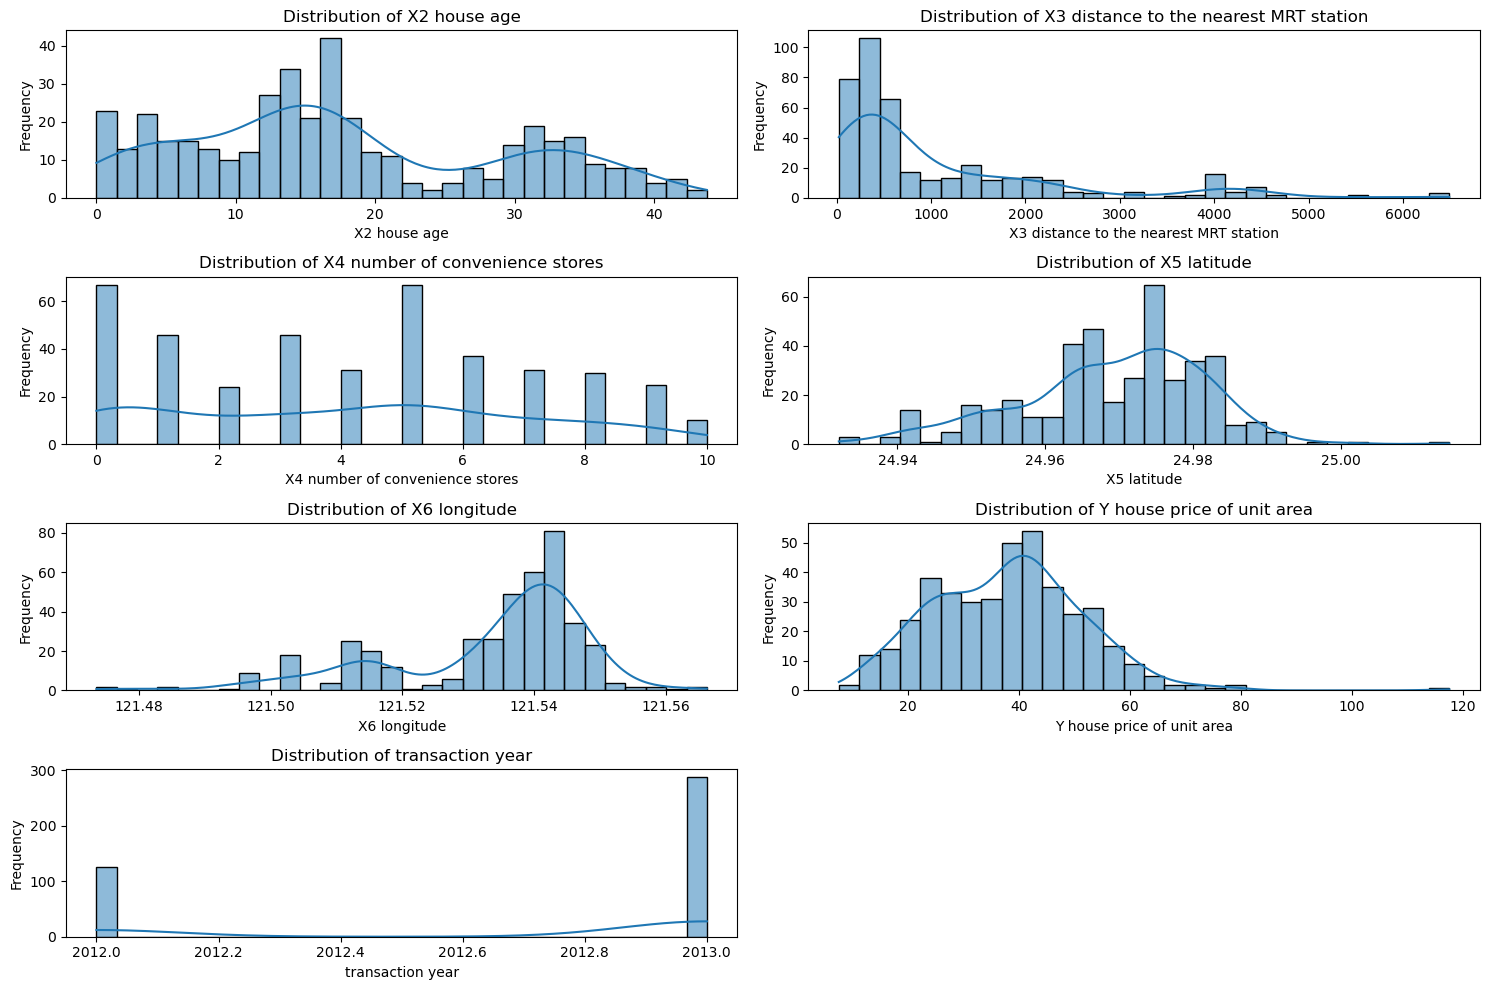

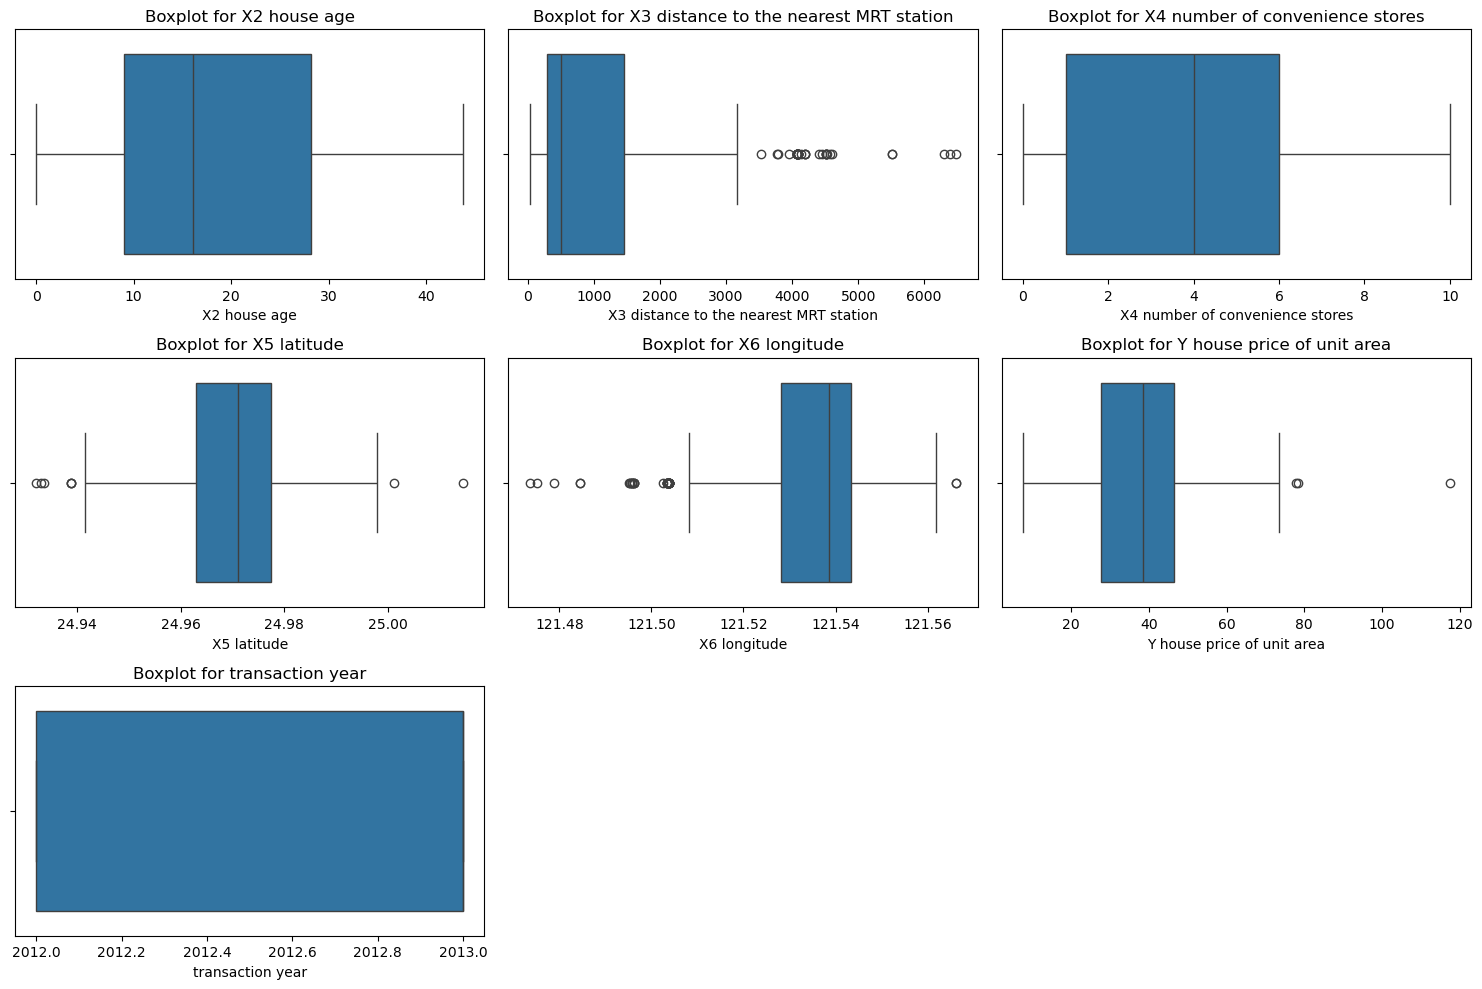

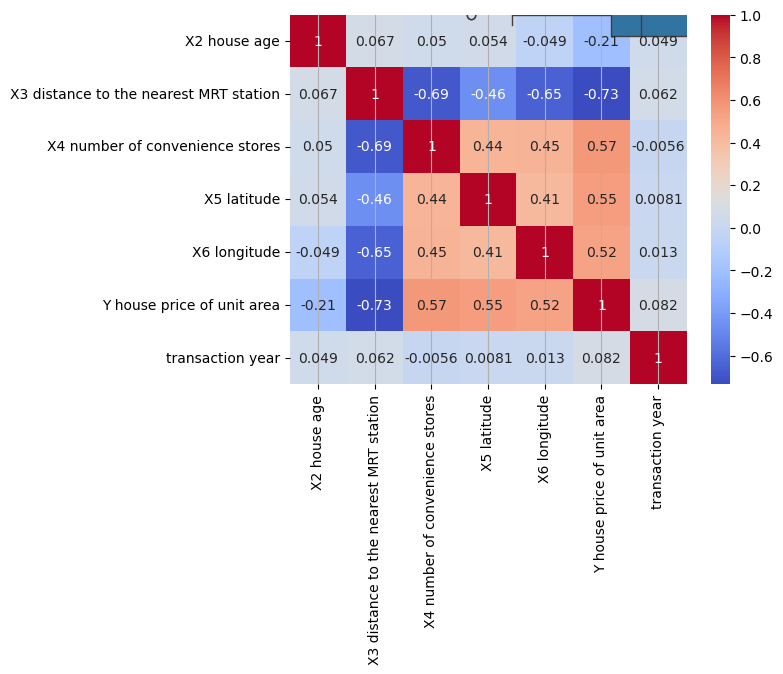

Best Linear Regression Parameters: {'copy_X': True, 'fit_intercept': True}
Root Mean Squared Error : 7.355687506941534
R2-score : 0.6588916087372654
Mean Absolute Error : 4.78079687289138
Best Linear Regression Parameters: {'max_iter': 1000}
Accuracy : 0.8365384615384616
Precision : 0.7291666666666666
Recall : 0.8974358974358975
F1-score : 0.8045977011494253


,Metric,Linear Regression,Logistic Regression
0,Root Mean Squared Error,7.355688,NaN
1,Mean Absolute Error,4.780797,NaN
2,R^2 Score,0.658892,NaN
3,Accuracy,NaN,0.836538
4,Precision,NaN,0.729167
5,Recall,NaN,0.897436
6,F1 Score,NaN,0.804598


In [3]:
#Analyzing the dataset

df.shape
df.describe()
df.info()

#Finding missing values

df.isna().sum()

#Extracting transaction year and dropping transaction date

df['transaction year'] = df['X1 transaction date'].apply(lambda x: int(x))
df = df.drop(columns = 'X1 transaction date')
df.info()

#Histogram plot to visualize distribution of data

plt.figure(figsize=(15, 10))

for i, j in enumerate(df.columns, 1):
    plt.subplot(4, 2, i) 
    sns.histplot(df[j], kde=True, bins=30)
    plt.title(f'Distribution of {j}')
    plt.xlabel(j)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Boxplot for better visualization of outliers in features and their spread

plt.figure(figsize=(15, 10))

for i, j in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[j])
    plt.title(f'Boxplot for {j}')

plt.tight_layout()
plt.show()

#Logarithmic transformation of ‘distance to nearest MRT station’ to counteract skewness and handle outliers

df['X3 distance to the nearest MRT station'] = np.log1p(df['X3 distance to the nearest MRT station'])
df['X3 distance to the nearest MRT station'].hist(bins=50)
sns.boxplot(x=df['X3 distance to the nearest MRT station'])

#Forming a correlation matrix and generating a heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#splitting data into 75-25% training and test set

X = df.drop(columns = 'Y house price of unit area')
Y = df['Y house price of unit area']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = 0.25,
                                                    random_state = 42)

#Normalization of the features using StrandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Using GridSearch to find the optimal parameters for linear regression

linear_regression_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

linear_regression_grid = GridSearchCV(estimator=LinearRegression(), param_grid=linear_regression_params, 
                                      scoring='r2', cv=5, n_jobs=-1)

linear_regression_grid.fit(X_train_scaled, Y_train)
best_lr_model = linear_regression_grid.best_estimator_
best_lr_params = linear_regression_grid.best_params_

print("Best Linear Regression Parameters:", best_lr_params)

#Linear regression with optimal parameters

lin_reg = LinearRegression() #default hyperparameter settings are found to be the best
lin_reg.fit(X_train_scaled, Y_train)
y_pred_linear = lin_reg.predict(X_test_scaled)

#Evaluation of linear regression model

linear_rmse = root_mean_squared_error(Y_test, y_pred_linear)
linear_r2 = r2_score(Y_test, y_pred_linear)
linear_mae = mean_absolute_error(Y_test, y_pred_linear)

print(f'Root Mean Squared Error : {linear_rmse}\nR2-score : {linear_r2}\nMean Absolute Error : {linear_mae}')

#Binarization of target value

median_price = Y_train.median()
y_train_binary = (Y_train >= median_price).astype(int)
y_test_binary = (Y_test >= median_price).astype(int)

#Using GridSearch to find optimal parameters for logistic regression model

logistic_regression_params = {
    'max_iter' : [1000, 5000, 10000]
    }

logistic_regression_grid = GridSearchCV(estimator=LogisticRegression(random_state = 42), param_grid=logistic_regression_params, 
                                      scoring='accuracy', cv=5, n_jobs=-1)

logistic_regression_grid.fit(X_train_scaled, y_train_binary)
best_log_model = logistic_regression_grid.best_estimator_
best_log_params = logistic_regression_grid.best_params_
print("Best Linear Regression Parameters:", best_log_params)

#Logistic regression with optimal parameters

log_reg = LogisticRegression(max_iter=1000, class_weight = 'balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_binary)
y_pred_logistic = log_reg.predict(X_test_scaled)

#Evaluation of logistic regression model

logistic_accuracy = accuracy_score(y_test_binary, y_pred_logistic)
logistic_precision = precision_score(y_test_binary, y_pred_logistic)
logistic_recall = recall_score(y_test_binary, y_pred_logistic)
logistic_f1 = f1_score(y_test_binary, y_pred_logistic)

print(f'Accuracy : {logistic_accuracy}\nPrecision : {logistic_precision}\nRecall : {logistic_recall}\nF1-score : {logistic_f1}')

#Printing results of both models in table format

performance_results = {
    'Metric': [
        'Root Mean Squared Error',
        'Mean Absolute Error',
        'R^2 Score',
        'Accuracy',
        'Precision',
        'Recall',
        'F1 Score'
    ],
    'Linear Regression': [
        linear_rmse,
        linear_mae,
        linear_r2,
        None,  # No value for linear regression metrics
        None,
        None,
        None
    ],
    'Logistic Regression': [
        None,  # No value for logistic regression metrics
        None,
        None,
        logistic_accuracy,
        logistic_precision,
        logistic_recall,
        logistic_f1
    ]
}

results_df = pd.DataFrame(performance_results)

results_df

